### 6 m is mean nitricline depth and just below 10% light level

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import glob
import datetime as dt
from salishsea_tools import viz_tools
from matplotlib.ticker import FormatStrFormatter
import cmocean
from salishsea_tools import viz_tools, evaltools as et
import NorthNut as nn
import matplotlib.gridspec as gridspec
import pickle
import matplotlib as mpl
import matplotlib.patheffects as path_effects
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

NorthNut defined variables: ig0,ig1,jg0,jg1,fformat0
NorthNut defined variables: vmask, vmask0, umask, umask0, tmask, fmask, gdept,  gdept_1d, e1t, e2t, e12t, e1f, e2f, e1v, e2u, e3t_1d
NorthNut defined variables: boxCol, colL, colR, arrowwidth, headwidth, headlength, alen, toff, apw, apk


In [2]:
ig0=nn.ig0
ig1=nn.ig1
jg0=nn.jg0
jg1=nn.jg1
tmask=nn.tmask
umask=nn.umask
vmask=nn.vmask
umask0=nn.umask0
vmask0=nn.vmask0
boxCol=nn.boxCol
colL=nn.colL
colR=nn.colR

In [3]:
e12t=nn.e12t

In [4]:
k=6 #depth presented here
k1=30 # max depth to do calcs to
start=dt.datetime(2015,5,15) # originally 5/15-8/15,  but changed to even number of fortnights (6, end is included)
end=dt.datetime(2015,8,20)
mod_basedir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/rev_noDisc/'
mod_nam_fmt='long'
mod_flen=10
saveloc='/data/eolson/results/MEOPAR/SS36runs/calcFiles/NTransport/'
fver='noDisc'

made interval a multiple of a fortnight in attempt to minimize aliasing of tidal cycle:

In [5]:
dt.datetime(2015,5,15)+dt.timedelta(days=7*14)

datetime.datetime(2015, 8, 21, 0, 0)

In [6]:
# calc transports: boxes in full model coords
boxes,boxesS=nn.defboxes(k)

volumes: 
(40, 130, 97)
0 vol: 232834007.16923195
0 north face area: 0.017903174399708822
0 floor area: 38.10316762126778
(40, 130, 97)
1 vol: 475501033.2591236
1 north face area: 0.051981996171633744
1 floor area: 76.65649877674242
(40, 130, 97)
2 vol: 467855857.4262955
2 north face area: 0.0660928789851366
2 floor area: 76.13281888160705
(40, 130, 97)
3 vol: 475349561.3011287
3 north face area: 0.0691002936013758
3 floor area: 77.68207812856889
(40, 130, 97)
4 vol: 460253674.3391861
4 north face area: 0.06656271287114815
4 floor area: 76.70622481510526
(40, 130, 97)
5 vol: 468674561.80761874
5 north face area: 0.07171871451380164
5 floor area: 76.99707667445263


In [7]:
np.mean(nn.e1t[boxesS[4]['j'][1],boxesS[4]['i'][0]:boxesS[4]['i'][1]])

426.7161561188531

In [8]:
np.sum(tmask[6,boxesS[4]['j'][1],(boxesS[4]['i'][0]):(boxesS[4]['i'][1])])*427*7/1e6

0.077714

In [9]:
np.sum(nn.e3t_0[:7,boxesS[4]['j'][1],boxesS[4]['i'][0]:boxesS[4]['i'][1]],0)

masked_array(data=[7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229],
             mask=False,
       fill_value=1e+20)

In [10]:
np.diff(np.array(([boxes[0]['j'][1]]+[boxes[el]['j'][0] for el in range(0,6)])))

array([-27, -15, -15, -15, -15, -15])

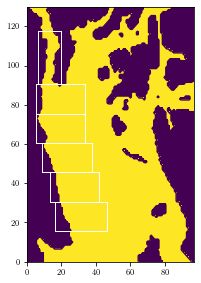

In [11]:
fig,ax=plt.subplots(1,1,figsize=(3,5))
viz_tools.set_aspect(ax)
ax.pcolormesh(nn.vmask0)
ax.pcolormesh(nn.tmask[0,:,:])
#ax.contour(tmask[k,:,:],[.5])
ax.contour(tmask[0,:,:],[.5])
for el in boxes.keys():
    iii,jjj=nn.makebox(nn.boxcoordsT(boxes[el]))
    ax.plot(iii-ig0,jjj-jg0,'-',color='w',linewidth=1)

In [12]:
flistV=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'dian_V',1)
flistU=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'dian_U',1)
flistW=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'dian_W',1)
#flistC=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'carp_T',1)
flistT=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'ptrc_T',1)
#flistP=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_T',1)
#flistGV=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_V',1)
#flistGU=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_U',1)

ftype=dian_V, are you sure? (if yes, add to list)
first file starts on  2015-05-11 00:00:00
ftype=dian_U, are you sure? (if yes, add to list)
first file starts on  2015-05-11 00:00:00
ftype=dian_W, are you sure? (if yes, add to list)
first file starts on  2015-05-11 00:00:00
first file starts on  2015-05-11 00:00:00


In [13]:
flistT.loc[0,['t_0']].values[0]

Timestamp('2015-05-11 00:00:00')

In [14]:
flistT.loc[len(flistT)-1,['t_n']].values[0]-dt.timedelta(days=1)

Timestamp('2015-08-28 00:00:00')

In [15]:
end

datetime.datetime(2015, 8, 20, 0, 0)

In [16]:
NBound, SBound, EBound, BBound, NBoundMix, SBoundMix, EBoundMix, BBoundMix, times, boxes = nn.calcTranspsReduced(
    start,end,k1,mod_flen,fver,saveloc,boxes,boxesS,flistV,flistU,flistW,flistT,recalc=False)

In [17]:
# vertical transport into 4th box
np.shape(BBound[3])

(2352, 30)

In [18]:
mapCol=(0.67, 0.8, 0.64) # rgb
cmb=cmocean.tools.crop_by_percent(cmocean.cm.balance, 45, which='both', N=None)
cmb.set_bad(mapCol)
cmc=cmocean.tools.crop_by_percent(cmocean.cm.tarn_r, 40, which='both', N=None)
cmc.set_bad(mapCol)

In [19]:
for el in BBound.keys():
    print(el,np.mean(np.sum(BBound[el][:,:k]+BBoundMix[el][:,:k],1))*1e-3)

0 0.0
1 -0.9795762277633858
2 -0.07218306753337561
3 -0.562741470691431
4 -0.21315006393333658
5 -0.6892309231591282


#### Sum of vertical mixing and transport NO3 supply to region in boxes:

In [20]:
np.mean(np.sum(BBound[0][:,:k]+BBoundMix[0][:,:k]+\
               BBound[1][:,:k]+BBoundMix[1][:,:k]+\
               BBound[2][:,:k]+BBoundMix[2][:,:k]+\
               BBound[3][:,:k]+BBoundMix[3][:,:k]+\
               BBound[4][:,:k]+BBoundMix[4][:,:k]+\
               BBound[5][:,:k]+BBoundMix[5][:,:k],1))*1e-3

-2.5168817530806584

##### Divide by area:

In [21]:
ABoxes=nn.boxAreas(k)

volumes: 
(40, 130, 97)
0 vol: 232834007.16923195
0 north face area: 0.017903174399708822
0 floor area: 38.10316762126778
(40, 130, 97)
1 vol: 475501033.2591236
1 north face area: 0.051981996171633744
1 floor area: 76.65649877674242
(40, 130, 97)
2 vol: 467855857.4262955
2 north face area: 0.0660928789851366
2 floor area: 76.13281888160705
(40, 130, 97)
3 vol: 475349561.3011287
3 north face area: 0.0691002936013758
3 floor area: 77.68207812856889
(40, 130, 97)
4 vol: 460253674.3391861
4 north face area: 0.06656271287114815
4 floor area: 76.70622481510526
(40, 130, 97)
5 vol: 468674561.80761874
5 north face area: 0.07171871451380164
5 floor area: 76.99707667445263


In [22]:
# units are umol/m2/s
Asum=ABoxes[0]+ABoxes[1]+ABoxes[2]+ABoxes[3]+ABoxes[4]+ABoxes[5]
np.mean(np.sum(BBound[0][:,:k]+BBoundMix[0][:,:k]+\
               BBound[1][:,:k]+BBoundMix[1][:,:k]+\
               BBound[2][:,:k]+BBoundMix[2][:,:k]+\
               BBound[3][:,:k]+BBoundMix[3][:,:k]+\
               BBound[4][:,:k]+BBoundMix[4][:,:k]+\
               BBound[5][:,:k]+BBoundMix[5][:,:k],1))/Asum*1e3

-0.005960250257706805

In [23]:
NBoundC, SBoundC, EBoundC, BBoundC, NBoundMixC, SBoundMixC, EBoundMixC, BBoundMixC = \
    nn.transpConversions(boxes,NBound,SBound,EBound,BBound,NBoundMix,SBoundMix,EBoundMix,BBoundMix,k)

0
0.0 0.0 0.0
0.0 0.0 0.0
1
-0.4378507356838243 -0.020823825716819854 0.06512570768975945
-0.00016273474620069107 0.022444307046106192 -0.0013930213915927228
2
-0.17285061765156096 0.0007372974770856719 0.004586488944110066
-0.00014781253573528923 0.024617743872447344 -0.0005852842197399689
3
-0.16442932552233488 -0.016146534272876364 -0.08552533510189755
-9.418057340255625e-05 0.027761020011738944 -0.0009963149756297232
4
-0.24955878026699027 -0.029879503516051033 -0.061318447143376933
-9.919765242672008e-05 0.04911502585374354 -0.001447528327751936
5
-0.33046414049733536 -0.0675644683727893 -0.08280307241568174
-6.600497569146892e-05 0.06869844288436652 -0.000840958684698951


In [24]:
BBoundC

{0: 0.0,
 1: -0.020823825716819854,
 2: 0.0007372974770856719,
 3: -0.016146534272876364,
 4: -0.029879503516051033,
 5: -0.0675644683727893}

In [25]:
mask=dict()
mask['V']=vmask0
mask['U']=umask0
mask['W']=tmask[k,:,:]

/ocean/eolson/MEOPAR/northernNO3PaperCalcs/notebooks/results/NorthNut.py:534: RuntimeWarning: invalid value encountered in double_scalars
  dl=val/np.abs(val)


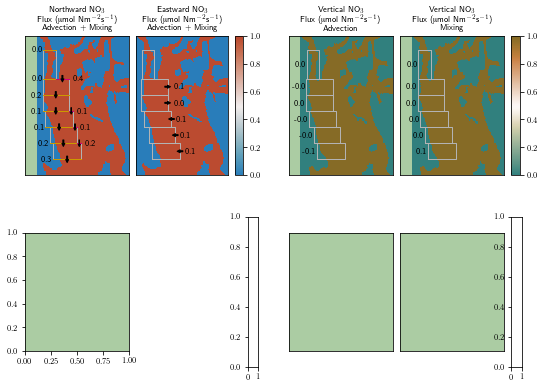

In [26]:
fig=plt.figure(figsize=(7.5,5.2))
gs0=gridspec.GridSpec(2,2,hspace=0.24,wspace=.13,left=.01,right=.93,bottom=.022,top=.92,
                      width_ratios=[1,1],height_ratios=[1,1])
ax=list()
cbax=list()
for jx in range(0,2):
    if jx==0:
        gsi=gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0,jx],
                                         width_ratios=[10,10*(ig1-ig0-.5)/(ig1-ig0+13),11-10*(ig1-ig0-.5)/(ig1-ig0+13)],wspace=.1)
        gsl=gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[1,jx],
                                         width_ratios=[10,10,1],wspace=.1)
    elif jx==1:
        gsi=gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0,jx],
                                         width_ratios=[10,10,1],wspace=.1)
        gsl2=gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[1,jx],
                                         width_ratios=[10,10,1],wspace=.1)
    ax1=fig.add_subplot(gsi[0])
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    viz_tools.set_aspect(ax1)
    ax2=fig.add_subplot(gsi[1])
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    viz_tools.set_aspect(ax2)
    ax3=fig.add_subplot(gsi[2])
    ax.append(ax1,)
    ax.append(ax2,)
    cbax.append(ax3,)
ax4=fig.add_subplot(gsl2[0])
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
viz_tools.set_aspect(ax4)
ax5=fig.add_subplot(gsl2[1])
ax5.get_xaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)
viz_tools.set_aspect(ax5)
ax6=fig.add_subplot(gsl2[2])
ax7=fig.add_subplot(gsl[0])
viz_tools.set_aspect(ax7)
ax9=fig.add_subplot(gsl[2])
ax.append(ax4,)
ax.append(ax5,)
ax.append(ax7,)
cbax.append(ax6,)
cbax.append(ax9,)

v1=3000
m=ax[0].pcolormesh(mask['V'],cmap=cmb)
ax[0].set_title('Northward NO$_3$\nFlux ($\muup$mol Nm$^{-2}$s$^{-1}$)\nAdvection + Mixing')
m=ax[1].pcolormesh(mask['U'],cmap=cmb)
cb0=fig.colorbar(m,cax=cbax[0])
ax[1].set_title('Eastward NO$_3$\nFlux ($\muup$mol Nm$^{-2}$s$^{-1}$)\nAdvection + Mixing')
v2=15
m=ax[2].pcolormesh(mask['W'],cmap=cmc)
ax[2].set_title('Vertical NO$_3$\nFlux ($\muup$mol Nm$^{-2}$s$^{-1}$)\nAdvection')
m=ax[3].pcolormesh(mask['W'],cmap=cmc)
cb1=fig.colorbar(m,cax=cbax[1])
ax[3].set_title('Vertical NO$_3$\nFlux ($\muup$mol Nm$^{-2}$s$^{-1}$)\nMixing')

nn.drawboxesV(ax[0],boxes,boxCol)
nn.drawboxesU(ax[1],boxes,boxCol)
nn.drawboxesT(ax[2],boxes,boxCol)
nn.drawboxesT(ax[3],boxes,boxCol)
for iax in ax:
    iax.set_facecolor(mapCol)
ax[0].set_xlim(-13,ig1-ig0)
ax[1].set_xlim(0,ig1-ig0-.5)
ax[2].set_xlim(-13,ig1-ig0)
ax[3].set_xlim(-13,ig1-ig0)

ax[0].set_ylim(.5,jg1-jg0-.5)
ax[1].set_ylim(1,jg1-jg0)
ax[2].set_ylim(1,jg1-jg0)
ax[3].set_ylim(1,jg1-jg0)

nn.annotYTranspUpper(ax[0],boxes,NBoundC,SBoundC,NBoundMixC,SBoundMixC)
nn.annotXTranspUpper(ax[1],boxes,EBoundC,EBoundMixC)
nn.annotWTTranspUpper(ax[2],boxes,BBoundC)
nn.annotWMTranspUpper(ax[3],boxes,BBoundMixC)

x1=ax[1].get_position()
xc1=cbax[0].get_position()
cbax[0].set_position(mpl.transforms.Bbox.from_bounds(xc1.bounds[0],x1.bounds[1],.015,x1.bounds[3]))
x2=ax[3].get_position()
xc2=cbax[1].get_position()
cbax[1].set_position(mpl.transforms.Bbox.from_bounds(xc2.bounds[0],x2.bounds[1],.015,x2.bounds[3]))

fig.canvas.draw()

#fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsNNut/Ntransports0_k'+str(k)+'.png',dpi=300)